<a href="https://colab.research.google.com/github/Agrave1/NFL_Scores/blob/main/Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
betting_df = pd.read_csv("/content/drive/MyDrive/Project 2/Spread_Scores.csv")
betting_df.head()

,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,total_score,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,9/2/1966,1966,1,False,Miami Dolphins,14.0,23.0,37,Oakland Raiders,NaN,NaN,NaN,Orange Bowl,False,83.0,6.0,71.0,NaN
1,9/3/1966,1966,1,False,Houston Oilers,45.0,7.0,52,Denver Broncos,NaN,NaN,NaN,Rice Stadium,False,81.0,7.0,70.0,NaN
2,9/4/1966,1966,1,False,San Diego Chargers,27.0,7.0,34,Buffalo Bills,NaN,NaN,NaN,Balboa Stadium,False,70.0,7.0,82.0,NaN
3,9/9/1966,1966,2,False,Miami Dolphins,14.0,19.0,33,New York Jets,NaN,NaN,NaN,Orange Bowl,False,82.0,11.0,78.0,NaN
4,9/10/1966,1966,1,False,Green Bay Packers,24.0,3.0,27,Baltimore Colts,NaN,NaN,NaN,Lambeau Field,False,64.0,8.0,62.0,NaN


In [4]:
betting_df2 = betting_df.copy()

## Data Cleaning

In [5]:
betting_df2.duplicated().sum()

0

In [6]:
betting_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13232 entries, 0 to 13231
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13232 non-null  object 
 1   schedule_season      13232 non-null  int64  
 2   schedule_week        13232 non-null  object 
 3   schedule_playoff     13232 non-null  bool   
 4   team_home            13232 non-null  object 
 5   score_home           13231 non-null  float64
 6   score_away           13231 non-null  float64
 7   total_score          13232 non-null  int64  
 8   team_away            13232 non-null  object 
 9   team_favorite_id     10753 non-null  object 
 10  spread_favorite      10753 non-null  float64
 11  over_under_line      10743 non-null  object 
 12  stadium              13232 non-null  object 
 13  stadium_neutral      13232 non-null  bool   
 14  weather_temperature  12189 non-null  float64
 15  weather_wind_mph     12172 non-null 

In [7]:
betting_df2.isna().sum()

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 1
score_away                 1
total_score                0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1043
weather_wind_mph        1060
weather_humidity        4791
weather_detail         10410
dtype: int64

In [8]:
betting_df2 = betting_df2.drop(labels = range(0,2500), axis = 0)
#Dropped those rows because all the missing values were at the start of the dataset
#Didn't impute because these betting statistics can't be imputed or they would skew the results for the games with accurate betting data

In [9]:
betting_df2["schedule_week"].replace({"SuperBowl" : "Superbowl", "WildCard" : "Wildcard"}, inplace = True)
betting_df2["schedule_week"].value_counts()

16            649
15            649
1             647
2             647
13            645
14            644
12            641
11            625
3             598
10            589
9             572
4             572
7             569
8             567
5             560
6             557
17            509
Division      172
Wildcard      160
Conference     86
Superbowl      44
18             30
Name: schedule_week, dtype: int64

In [10]:
betting_df2["over_under_line"].replace(" ", 41, inplace = True)
#Replaced the empty space with the most common over under value because other inputs such as mean or median produced an error

In [11]:
betting_df2["score_home"].fillna(23, inplace = True)
betting_df2["score_away"].fillna(20, inplace = True)
#Filled in missing values for Superbowl 2021 season with correct score after google searching

In [12]:
median_temp = betting_df2["weather_temperature"].median()
betting_df2["weather_temperature"].fillna(median_temp, inplace = True)
betting_df2["weather_temperature"].describe()
#Chose median because weather has outlier values for both warm and cold weather. Football is not often played in either
#below zero temperatures or close to 100 degreees

count    10732.000000
mean        60.272177
std         14.869137
min         -6.000000
25%         51.000000
50%         64.000000
75%         72.000000
max         97.000000
Name: weather_temperature, dtype: float64

In [13]:
median_wind = betting_df2["weather_wind_mph"].median()
betting_df2["weather_wind_mph"].fillna(median_wind, inplace = True)
betting_df2["weather_wind_mph"].describe()
#Chose median because even though mean would be the same value, median is a whole number while mean would have to be rounded

count    10732.000000
mean         7.184215
std          5.526318
min          0.000000
25%          2.000000
50%          7.000000
75%         11.000000
max         40.000000
Name: weather_wind_mph, dtype: float64

In [14]:
median_humidity = betting_df2["weather_humidity"].median()
betting_df2["weather_humidity"].fillna(median_humidity, inplace = True)
betting_df2["weather_humidity"].describe()
#Chose mean because outliers such a 4% percent humidity lower the mean and median provides a better central value of humidity

count    10732.000000
mean        67.152348
std         12.357328
min          4.000000
25%         65.000000
50%         68.000000
75%         72.000000
max        100.000000
Name: weather_humidity, dtype: float64

In [15]:
betting_df2 = betting_df2.drop(columns = ["weather_detail"])
#Too many categorical values and too many missing values to input based on most frequent
#Most frequent was dome and many stadiums and games would be incorrectly classified as dome if imputed

In [16]:
betting_df2.isna().sum()

schedule_date          0
schedule_season        0
schedule_week          0
schedule_playoff       0
team_home              0
score_home             0
score_away             0
total_score            0
team_away              0
team_favorite_id       0
spread_favorite        0
over_under_line        0
stadium                0
stadium_neutral        0
weather_temperature    0
weather_wind_mph       0
weather_humidity       0
dtype: int64

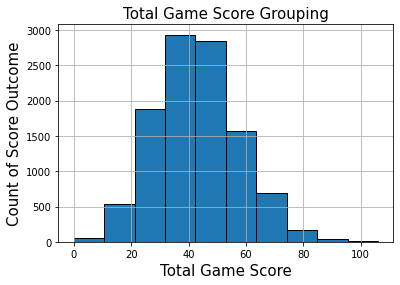

In [17]:
betting_df2["total_score"].hist(edgecolor = "black")
plt.title("Total Game Score Grouping", fontsize = 15)
plt.xlabel("Total Game Score", fontsize = 15)
plt.ylabel("Count of Score Outcome", fontsize = 15)
plt.show()
#Majority of total score outcomes between range of approximately 32-52

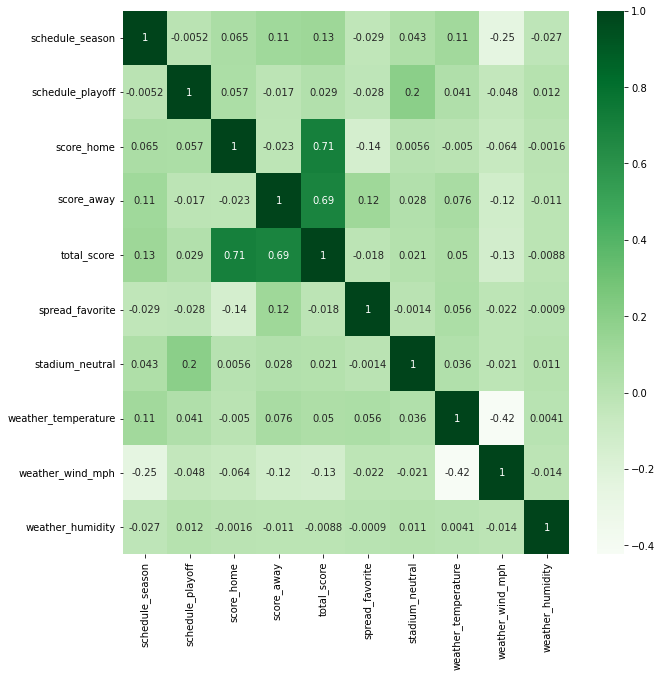

In [18]:
corr = betting_df2.corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap = "Greens", annot = True)
plt.show()

# Preprocessing

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector

In [20]:
betting_df2["schedule_week"].value_counts()
betting_df2.replace({"Wildcard" : 19, "Division" : 20, "Conference" : 21, "Superbowl" : 22}, inplace = True)
betting_df2["schedule_week"] = betting_df2["schedule_week"].astype(int)
betting_df2["schedule_week"].value_counts()

16    649
15    649
1     647
2     647
13    645
14    644
12    641
11    625
3     598
10    589
9     572
4     572
7     569
8     567
5     560
6     557
17    509
20    172
19    160
21     86
22     44
18     30
Name: schedule_week, dtype: int64

In [21]:
betting_df2["over_under_line"] = betting_df2["over_under_line"].astype(float)

In [22]:
betting_df2["schedule_playoff"].value_counts()
betting_df2["schedule_playoff"].replace({False : 0, True : 1}, inplace = True)
betting_df2["schedule_playoff"].value_counts()

0    10270
1      462
Name: schedule_playoff, dtype: int64

In [23]:
betting_df2["stadium_neutral"].value_counts()
betting_df2["stadium_neutral"].replace({False : 0, True : 1}, inplace = True)
betting_df2["stadium_neutral"].value_counts()

0    10642
1       90
Name: stadium_neutral, dtype: int64

In [24]:
X = betting_df2.drop(columns = ["total_score", "schedule_date"])
y = betting_df2["total_score"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [25]:
cat_selector = make_column_selector(dtype_include = "object")
cat_selector(X_train)

['team_home', 'team_away', 'team_favorite_id', 'stadium']

In [26]:
train_cat_data = X_train[cat_selector(X_train)]
test_cat_data = X_test[cat_selector(X_test)]
train_cat_data

,team_home,team_away,team_favorite_id,stadium
8214,Cleveland Browns,Oakland Raiders,CLE,FirstEnergy Stadium
8487,New England Patriots,Seattle Seahawks,NE,Gillette Stadium
12995,Cincinnati Bengals,Jacksonville Jaguars,CIN,Paul Brown Stadium
8189,Denver Broncos,Detroit Lions,DEN,Sports Authority Field at Mile High
9224,Baltimore Ravens,New York Jets,BAL,M&T Bank Stadium
...,...,...,...,...
8234,Miami Dolphins,New England Patriots,MIA,Sun Life Stadium
7691,Minnesota Vikings,Green Bay Packers,GB,Hubert H. Humphrey Metrodome
7890,Carolina Panthers,Detroit Lions,CAR,Bank of America Stadium
3360,Detroit Lions,Cleveland Browns,DET,Pontiac Silverdome


In [27]:
ohe = OneHotEncoder(sparse = False, handle_unknown = "ignore")
ohe.fit(train_cat_data)
train_ohe = ohe.transform(train_cat_data)
test_ohe = ohe.transform(test_cat_data)
train_ohe

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [28]:
ohe_column_names = ohe.get_feature_names_out(train_cat_data.columns)
train_ohe = pd.DataFrame(train_ohe, columns = ohe_column_names)
test_ohe = pd.DataFrame(test_ohe, columns = ohe_column_names)
train_ohe

,team_home_Arizona Cardinals,team_home_Atlanta Falcons,team_home_Baltimore Colts,team_home_Baltimore Ravens,team_home_Buffalo Bills,team_home_Carolina Panthers,team_home_Chicago Bears,team_home_Cincinnati Bengals,team_home_Cleveland Browns,team_home_Dallas Cowboys,...,stadium_Three Rivers Stadium,stadium_Tiger Stadium (LSU),stadium_Tottenham Hotspur Stadium,stadium_Tottenham Stadium,stadium_Twickenham Stadium,stadium_U.S. Bank Stadium,stadium_University of Phoenix Stadium,stadium_Vanderbilt Stadium,stadium_Veterans Stadium,stadium_Wembley Stadium
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8046,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8047,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
num_selector = make_column_selector(dtype_include = "number")
train_nums = X_train[num_selector(X_train)].reset_index(drop = True)
test_nums = X_test[num_selector(X_test)].reset_index(drop = True)
X_train_processed = pd.concat([train_nums, train_ohe], axis = 1)
X_test_processed = pd.concat([test_nums, test_ohe], axis = 1)
X_train_processed

,schedule_season,schedule_week,schedule_playoff,score_home,score_away,spread_favorite,over_under_line,stadium_neutral,weather_temperature,weather_wind_mph,...,stadium_Three Rivers Stadium,stadium_Tiger Stadium (LSU),stadium_Tottenham Hotspur Stadium,stadium_Tottenham Stadium,stadium_Twickenham Stadium,stadium_U.S. Bank Stadium,stadium_University of Phoenix Stadium,stadium_Vanderbilt Stadium,stadium_Veterans Stadium,stadium_Wembley Stadium
0,2003,6,0,13.0,7.0,-3.5,43.5,0,62.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2004,6,0,30.0,20.0,-3.5,42.0,0,52.0,14.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021,4,0,24.0,21.0,-7.5,46.0,0,64.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2003,4,0,20.0,16.0,-12.0,44.0,0,54.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007,2,0,20.0,13.0,-10.0,33.0,0,58.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,2003,7,0,13.0,19.0,-6.5,37.0,0,78.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8045,2001,6,0,35.0,13.0,-3.0,47.5,0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8046,2002,2,0,31.0,7.0,-3.0,35.5,0,70.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8047,1983,2,0,26.0,31.0,-3.0,39.0,0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Regression

In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

In [33]:
knn = KNeighborsClassifier(n_neighbors = 1)
scaler = StandardScaler()
knn_pipe = make_pipeline(scaler, knn)
knn_pipe.fit(X_train_processed, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

In [34]:
acc_score_train = knn_pipe.score(X_train_processed, y_train)
acc_score_test = knn_pipe.score(X_test_processed, y_test)
print(f"Training Accuracy: {acc_score_train:.3f}")
print(f"Testing Accuracy: {acc_score_test:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.028


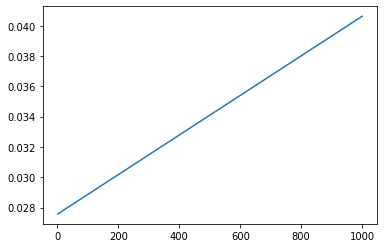

Best K value is 1000 with 0.04062616474096161 accuracy on the test set


In [35]:
krange = (1, 1000)
test_accuracies = []
best_accuracy = 0
best_k = 0
for k in krange:
  knn_pipe2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = k))
  knn_pipe2.fit(X_train_processed, y_train)
  acc_score = accuracy_score(y_test, knn_pipe2.predict(X_test_processed))
  if acc_score > best_accuracy:
    best_accuracy = acc_score
    bestk = k
  test_accuracies.append(acc_score)
plt.plot(krange, test_accuracies, label = "Test K Scores")
plt.show()
print(f"Best K value is {bestk} with {acc_score} accuracy on the test set")

This model is perhaps overfit because the training accuracy is very high, but the testing accuracy is relatively low. The predictions are very poor on the testing data.

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
dec_tree = DecisionTreeRegressor(random_state = 42)
dec_tree.fit(X_train_processed, y_train)

DecisionTreeRegressor(random_state=42)

In [40]:
train_preds = dec_tree.predict(X_train_processed)
test_preds = dec_tree.predict(X_test_processed)

In [46]:
dec_tree_train_score = dec_tree.score(X_train_processed, y_train)
dec_tree_test_score = dec_tree.score(X_test_processed, y_test)
print(f"Training Accuracy: {dec_tree_train_score:.3f}")
print(f"Testing Accuracy: {dec_tree_test_score:.3f}")

Training Accuracy: 1.000
Testing Accuracy: 0.998


In [49]:
depths = list(range(2, 36))
scores = pd.DataFrame(index=depths, columns=['Test Score','Train Score'])
for depth in depths:
    dec_tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    dec_tree.fit(X_train_processed, y_train)
    train_score = dec_tree.score(X_train_processed, y_train)
    test_score = dec_tree.score(X_test_processed, y_test)
    scores.loc[depth, 'Train Score'] = train_score
    scores.loc[depth, 'Test Score'] = test_score

Text(0, 0.5, 'R2')

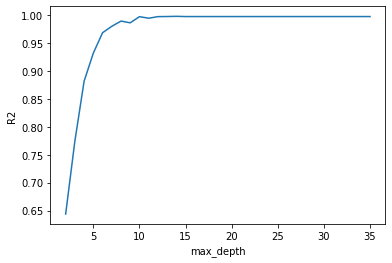

In [51]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2')

Both the testing and training accuracy are very high for this model. This is opposite to the previous model with a low test score with the model predicting very efficiently.

In [65]:
sorted_scores = scores.sort_values(by='Test Score', ascending=False)
sorted_scores.head()

,Test Score,Train Score
14,0.998385,0.999999
13,0.998053,0.999996
19,0.998004,1.0
20,0.998004,1.0
22,0.998004,1.0
